In [14]:
from concurrent.futures import ThreadPoolExecutor,as_completed
from data_loader import *
from visualizations import *
from itertools import product
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import xarray as xr

In [3]:
with open("config.yaml",'r') as file:
    config = yaml.safe_load(file)

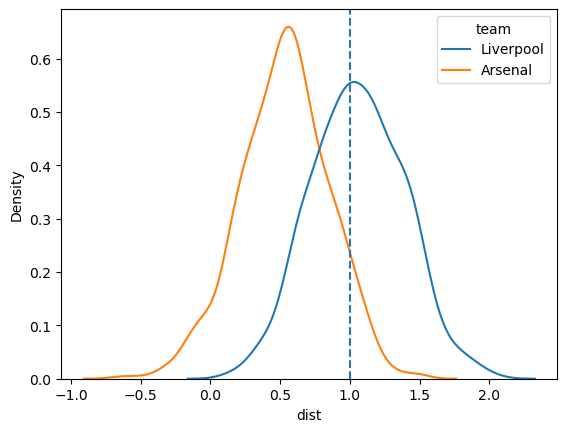

In [96]:
with open(config['HOME_DIRECTORY'] + "/streamlit/app_config.yaml", 'r') as file:
    app_config = yaml.safe_load(file)

model_path = os.path.join(config['HOME_DIRECTORY'], "deployed_models", app_config['deployed_model'])

theta_mean = xr.open_dataarray(os.path.join(model_path, "bayesian_theta_mean.nc"))
theta_sd = xr.open_dataarray(os.path.join(model_path, "bayesian_theta_sd.nc"))

team = 'Liverpool'
opp = 'Arsenal'

mu = theta_mean.sel(team = [team,opp],season ='2024/2025').to_pandas()
sigma =theta_sd.sel(team = [team,opp],season ='2024/2025').to_pandas()

post_df = pd.DataFrame()
post_df = pd.DataFrame({"team":[team]*1000,"dist":sc.norm(mu[team],sigma[team]).rvs(1000)})
post_df = pd.concat([post_df,pd.DataFrame({"team":[opp]*1000,"dist":sc.norm(mu[opp],sigma[opp]).rvs(1000)})],axis = 0)
post_df

fig, axes = plt.subplots()
fig = sns.kdeplot(post_df,x = 'dist',hue = 'team',ax = axes)
axes.axvline(1,linestyle = '--')




In [ ]:
team = ['Liverpool','Chelsea','Arsenal','Newcastle']
season = [2021]
pairs = list(product(team,season))

with ThreadPoolExecutor(max_workers= 3) as executor:
    
    futures = {executor.submit(read_fixtures_for_season, t,s): (t,s) for t,s in pairs}
    
    

processing for Liverpool, 2021
processing for Chelsea, 2021
processing for Arsenal, 2021
Pulling for Arsenal,2021 with league_id: 39
Pulling for Liverpool,2021 with league_id: 39
Pulling for Chelsea,2021 with league_id: 39


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_fixtures['winner'] = np.where(team_fixtures.teams_home_winner == True,team_fixtures.teams_home_name,
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_fixtures['winner'] = np.where(team_fixtures.teams_home_winner == True,team_fixtures.teams_home_na

processing for Newcastle, 2021
Pulling for Newcastle,2021 with league_id: 39


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_fixtures['winner'] = np.where(team_fixtures.teams_home_winner == True,team_fixtures.teams_home_name,
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:112: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - 

In [25]:
print(stop - start)

0:00:00.002563


In [26]:
3*38

114

In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

sales = pd.read_csv("/Users/echhitjoshi/Downloads/Sales.csv")
opps = pd.read_csv("/Users/echhitjoshi/Downloads/Opportunities.csv")

In [39]:
sales.tail()

,Sales_Order,Quarter,Month,Week,Closed_Date,Sale_Amount_,Group,Product,Category,Fiscal_Year,amendments,Sales_Representative,Customer_group,Customer,Country,Sales_Engineer,Customer_Category_,Description,Accounting_coVe
4613,SO340239315,2/1/2023,Jun,Week24-2023,6/26/2023,868.10,mau,Paid Eval License,55,2023,1,Nathan Howard,TZTUFN TBMFT,N B Dpn Ufdi Btjb Jod,TWN,QI,1,QBMMBEJVN BMMPZ TDSVC S,EZ2W
4614,SO340248955,3/1/2023,Aug,Week32-2023,8/9/2023,1595.81,mau,Paid Eval License,55,2023,1,Dylan Edwards,BTF,BTF Lpsfb,KOR,QI,1,IJHI IBSEOFTT SD TDSVC S,EZ2W
4615,SO340248958,3/1/2023,Aug,Week32-2023,8/22/2023,366.29,mau,Paid Eval License,55,2023,1,Dylan Edwards,BTF,BTF Lpsfb,KOR,QI,1,IJHI IBSEOFTT SD TDSVC S,EZ2W
4616,SO340249578,3/1/2023,Aug,Week32-2023,8/17/2023,491.97,mau,Paid Eval License,55,2023,1,Nathan Howard,TZTUFN TBMFT,Tpojpo Wjfuobn Dp Mue,VNM,QI,1,QBMMBEJVN BMMPZ TDSVC S,EZ2W
4617,SO340253427,3/1/2023,Sep,Week36-2023,9/20/2023,1770.92,mau,Paid Eval License,55,2023,1,Dylan Edwards,BTF,BTF Lpsfb,KOR,QI,1,IJHI IBSEOFTT SD TDSVC S,EZ2W


In [40]:
print(opps.shape)
print(opps.drop_duplicates().shape)

print(sales.shape)
print(sales.drop_duplicates().shape)

(4361, 22)
(4361, 22)
(4618, 19)
(4618, 19)


In [41]:
opps['target'] = np.where(opps['Opportunity_number'].str.replace("ON","").isin(sales['Sales_Order'].str.replace("SO","")),1,0)

In [42]:
opps.target.value_counts()

target
0    2387
1    1974
Name: count, dtype: int64

In [43]:
X_train, X_test,y_train,ytest = train_test_split(opps.drop(columns = ['target']),opps['target'],stratify= opps['target'],test_size=.25)

In [47]:
X_train.to_csv('/Users/echhitjoshi/Downloads/train_opp.csv')
X_test.to_csv('/Users/echhitjoshi/Downloads/test_opp.csv')


In [ ]:
# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Required imports

from utils.notebookhelpers.helpers import Helpers
from utils.dtos.templateOutputCollection import TemplateOutputCollection
from utils.dtos.templateOutput import TemplateOutput
from utils.dtos.templateOutput import OutputType
from utils.dtos.templateOutput import ChartType
from utils.dtos.variable import Metadata
from utils.rcclient.commons.variable_datatype import VariableDatatype
from utils.dtos.templateOutput import FileType
from utils.dtos.rc_ml_model import RCMLModel
from utils.notebookhelpers.helpers import Helpers
from utils.libutils.vectorStores.utils import VectorStoreUtils

context = Helpers.getOrCreateContext(contextId='contextId', localVars=locals())

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Your code goes here
test_entity = Helpers.getEntityData(context, 'OutputDataset_4b2c0')

import pandas as pd
import numpy as np

output_df_1 = test_entity.copy()
output_df_1['predict_old'] =  output_df_1['predict']
# Test with threshold tuning:
output_df_1['predict']= np.where(output_df_1['1_prob'] > .45,1,0)


# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE

Helpers.save_output_dataset(context=context, output_name='outputDataset', data_frame=output_df_1)

,Opportunity_number,Stage,Customer,Account_Exec,Deal_Type,Sales_Engineering_team,Contact_type,Product,Amount,Date,Schedule,flagged,Auditor,Eng_Dept,approver,Sub,slipped,service_credit_included,special_discount_code,Churn_RIsk_x,CSM_assigned,legal_status
1347,ON340227612,1,Bobmph Efwjdft Hfo Usjbt Jod,Lcen{p Tqug Ucpvqu,DVI 101I QUC USJ 101I M KUJ 100,HfnjojLfmwjo,Joufsgbdf Uppmjoh,Enterprise License,5957.44,2023-03-29,32660.0,NaN,0,NaN,Octe Mqtwu,Europe,No,YES,39573.0,0,Yes,RfwhmRfwh Ptwzxknqq tzy
541,ON340220696,1,Ofyqfsjb Dijob Mue,Lqg{ Hqpi,UFTU GMBU LFMWJO TPE10099100 GMZ - BU W99,HfnjojLfmwjo,GmbuEjtdsfuf,user license,1950.00,2023-02-07,32618.0,NaN,0,NaN,Ejc Ogpfq c,Japan,No,NO,39531.0,0,Yes,KjgwzfwaHmf Rjsitfknqq tzy
1177,ON340227366,1,Njdspdijq Ufdiopmphz Uibjmboe Dp Mue,xxx,DMFBOJOH CSVTI LJU,HfnjojLfmwjo,Vojwfstbm,user license,125.00,2023-03-19,NaN,NaN,0,NaN,Dtkvvpg_Rncv_gt,North America,No,NO,39570.0,0,Yes,RfwhmOjxxnhf Gfpjwknqq tzy
2206,ON340236727,1,Cspbedpn Dpsqpsbujpo,Mko Dcttgvv,DQ QDC (CDN),HfnjojLfmwjo,yyy,user license,0.00,2023-05-24,32718.0,NaN,0,NaN,TcgCpp Gppg,North America,No,NO,39631.0,0,Yes,RfaWfjFss Jssjaknqq tzy
2300,ON340238765,1,Bobmph Efwjdft Hfo Usjbt Jod,Lcen{p Tqug Ucpvqu,BDUVBUPS TNBMM PVUMJOF IJOHFE,HfnjojLfmwjo,yyy,user license,978.00,2023-06-01,NaN,NaN,0,NaN,Dtkvvpg_Rncv_gt,Japan,No,NO,39644.0,0,Yes,RfaLjt Rfhfqnstknqq tzy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,ON340251765,1,Njdspdijq Ufdiopmphz Pqfsbujpot Qijmjqqjoft ...,Rcvtkem Oqqp,TQBSF QBSU LJU,HfnjojLfmwjo,Cboubn,user license,833.00,2023-08-24,32816.0,NaN,0,NaN,Lguukec Dcmgt,North America,No,NO,39729.0,0,Yes,FzlzxyOjxxnhf Gfpjwknqq tzy
1022,ON340225601,1,Nbyjn Qijmjqqjoft Pqfsbujoh Dpsq,Okmg Ocpcnq,VQTFMM Qbsu,HfnjojLfmwjo,yyy,user license,2253.84,2023-03-09,32647.0,NaN,89982,50044.6016,Kxgnkpc Knejgxc,Europe,Yes,NO,39560.0,1,Yes,RfwhmN{jqnsf Nqhmj{fStknqq tzy
1862,ON340233825,2,PO Tfnjdpoevdups Usbejoh TBSM,Ewdkp Ecxgpvc,TD1029797-NFS102-EK-9797-9799,HfnjojLfmwjo,Nfsdvsz,user license,1375.00,2023-05-02,32699.0,NaN,0,NaN,Dtkvvpg_Rncv_gt,North America,No,NO,39612.0,0,Yes,FuwnqWfjFss Jssjaknqq tzy
2665,ON340237323,2,PTSBN Pqup Tfnjdpoevdupst Nbmbztjb Teo Cie,Fcpp{ Ngg,QFEFTUBM MFE EFWJDF IPMEFS RGO98.99102Y98.1031...,HfnjojLfmwjo,yyy,test license,472.00,2023-06-24,32754.0,NaN,0,NaN,Dtkvvpg_Rncv_gt,Japan,No,NO,39667.0,0,Yes,OzsjHmf Rjsitfknqq tzy


In [30]:
test_dat = pd.read_csv("/Users/echhitjoshi/Downloads/Test_set-runConfig-4a2c91d9-627d-43d8-9b08-75d2223e67ff-Sales Recipe.csv")

In [33]:
test_dat['target'] = test_dat['target'].astype('category')

# Save to CSV with category labels (human-readable)
test_dat.to_csv('/Users/echhitjoshi/Downloads/test_file.csv', index=False)

In [1]:
### LLM


In [11]:
import os
from openai import OpenAI

token = config['OPENAI_TOKEN']
endpoint = "https://models.github.ai/inference"
model = "gpt-4o"


def ask_gpt(dat, question):

    """
    dat: pandas DataFrame to ask gpt a question about
    question: question to ask of the data
    """

    client = OpenAI(
        base_url=endpoint,
        api_key=token,
    )

    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": """You are a helpful assistant who always responds with Python code.
                The response must be valid Python code that defines a python objects with appropriate structure. 
                No narrative—just the code."""
            },
            {
                "role": "user",
                "content": f"""
                
                Given this data: {dat.to_csv(index = False)}

                
                please answer:
                {question}
                
                
                
                
                
                """,
            }
        ],
        model=model
    )

    
    content = response.choices[0].message.content

    return content
    

